In [152]:
import requests
import lxml
import Queue
from lxml import etree
from StringIO import StringIO
import matplotlib.pyplot as plt
import re
import numpy as np

%matplotlib inline

In [5]:
headers = {
    'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.143 Safari/537.36'
}

In [10]:
def get_dom_from_string(html):
	try:
		tree = etree.parse(StringIO(html), etree.HTMLParser())
	except Exception:
		tree = None
	return tree

In [6]:
html = requests.get('http://bj.lianjia.com/ershoufang', headers=headers)

In [11]:
dom = get_dom_from_string(html.content)

In [20]:
lis = dom.findall('//li[@class="clear"]')

In [22]:
li = lis[0]

In [74]:
div = li.find('div/div[@class="title"]/a')
div

<Element a at 0x10e66fb90>

In [39]:
print etree.tostring(div, pretty_print=True)

<a href="http://bj.lianjia.com/ershoufang/101100762406.html" target="_blank" data-bl="list" data-log_index="1" data-el="ershoufang">&#40857;&#27901;&#33489;&#35199;&#21306;&#20004;&#23621;&#23460;&#65292;&#21830;&#21697;&#25151;&#24050;&#32463;&#28385;&#20116;&#24180;&#65292;&#22909;&#25143;&#22411;</a>



In [75]:
div.text

u'\u9f99\u6cfd\u82d1\u897f\u533a\u4e24\u5c45\u5ba4\uff0c\u5546\u54c1\u623f\u5df2\u7ecf\u6ee1\u4e94\u5e74\uff0c\u597d\u6237\u578b'

In [42]:
div.attrib['href']

'http://bj.lianjia.com/ershoufang/101100762406.html'

In [52]:
div = li.find('div/div[@class="address"]/div')

In [57]:
div.find('a').text

u'\u9f99\u6cfd\u82d1\u897f\u533a'

In [54]:
print etree.tostring(div, pretty_print=True)

<div class="houseInfo"><span class="houseIcon"/><a href="http://bj.lianjia.com/xiaoqu/1111027378235/" target="_blank" data-bl="list" data-log_index="1" data-el="region">&#40857;&#27901;&#33489;&#35199;&#21306;</a> | 2&#23460;1&#21381; | 80.35&#24179;&#31859; | &#21335; &#21271; | &#31934;&#35013; | &#26080;&#30005;&#26799;</div>



In [76]:
print dom_text_content(div)

龙泽苑西区两居室，商品房已经满五年，好户型


In [65]:
def dom_text_content(elem):
    import re
    return re.sub(r'\s+', '', etree.tostring(elem, method='text',encoding='unicode').strip())


In [72]:
!python ./scraw.py

scraw URL: http://bj.lianjia.com/ershoufang/pg1/
Traceback (most recent call last):
  File "./scraw.py", line 95, in <module>
    main()
  File "./scraw.py", line 86, in main
    handlers[url_type](url)
  File "./scraw.py", line 75, in scraw_fangzi_info
    save_data('\t'.join(data) + '\n')
TypeError: sequence item 2: expected string or Unicode, NoneType found


In [78]:
import re
def dom_text_content(elem, replace=''):
    if elem is None:
        return ''
    return re.sub(r'\s+', replace, etree.tostring(elem, method='text',encoding='unicode').strip())


In [80]:
print dom_text_content(div)

龙泽苑西区两居室，商品房已经满五年，好户型


In [82]:
import pandas as pd

In [99]:
df = pd.read_csv('./data/res.csv', sep='\t', header=None, names=['url', 'title','info','pos','follow','tag','price','unitprice'])

In [109]:
df.head()

,url,title,info,pos,follow,tag,price,unitprice,price_num
0,http://bj.lianjia.com/ershoufang/101100762406....,龙泽苑西区两居室，商品房已经满五年，好户型,龙泽苑西区|2室1厅|80.35平米|南北|精装|无电梯,低楼层(共6层)2000年建板楼-龙泽,120人关注/共50次带看/7天以前发布,距离13号线龙泽站428米房本满两年随时看房,460万,单价57250元/平米,460.0
1,http://bj.lianjia.com/ershoufang/101100671982....,新城经典东向大三居，高层观景 视野棒。满五年唯一 ！,望京新城|3室2厅|142.93平米|东南|精装|有电梯,高楼层(共25层)2000年建板塔结合-望京,127人关注/共44次带看/26天以前发布,距离15号线望京站517米房本满两年随时看房,865万,单价60520元/平米,865.0
2,http://bj.lianjia.com/ershoufang/101100672915....,东南金角 免税电梯花园洋房 居家养老宜居,东亚上北中心|2室1厅|77平米|东南|精装|有电梯,中楼层(共21层)2009年建板塔结合-回龙观,79人关注/共54次带看/26天以前发布,房本满两年随时看房不限购,306万,单价39741元/平米,306.0
3,http://bj.lianjia.com/ershoufang/101100755034....,朝阳园 二期小三居 满五年 高楼层 视野开阔 有钥匙,朝阳园|3室2厅|113.22平米|西|精装|有电梯,高楼层(共29层)2002年建塔楼-甘露园,92人关注/共31次带看/9天以前发布,距离6号线青年路站575米房本满两年随时看房,690万,单价60944元/平米,690.0
4,http://bj.lianjia.com/ershoufang/101100656261....,免税 东南双卫三居 带飘窗 随时看房诚意出售,苹果社区南区|3室1厅|124.58平米|东南|精装|有电梯,中楼层(共26层)2006年建板塔结合-双井,79人关注/共50次带看/30天以前发布,距离7号线九龙山站816米房本满两年随时看房,1060万,单价85086元/平米,1060.0


In [100]:
df['price_num'] = df.price.map(lambda x: float(x.replace(u'万'.encode('utf-8'),'')))

In [102]:
df.price_num.mean()

578.12205387205393

(0, 3000)

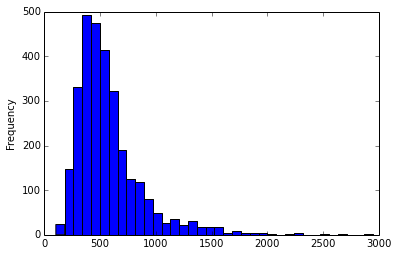

In [107]:
df.price_num.plot(kind='hist',bins=100)
plt.xlim([0, 3000])

In [108]:
df.price_num.describe()

count    2970.000000
mean      578.122054
std       333.382576
min       105.000000
25%       385.000000
50%       500.000000
75%       664.500000
max      8000.000000
Name: price_num, dtype: float64

In [119]:
df['unitprice_num'] = df.unitprice.map(lambda x: float(re.search(r'\d+', x).group()))

In [121]:
df.unitprice_num.describe()

count      2970.000000
mean      61858.156229
std       22183.682112
min       19966.000000
25%       45925.250000
50%       57468.000000
75%       76094.500000
max      148838.000000
Name: unitprice_num, dtype: float64

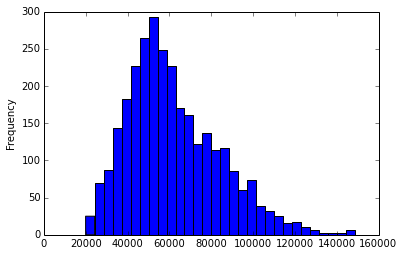

In [123]:
df.unitprice_num.plot(kind='hist', bins=30)

In [133]:
df['xiaoqu'] = df['info'].map(lambda x: x.split('|')[0])
df['fangxin'] = df['info'].map(lambda x: x.split('|')[1])
df['area'] = df['info'].map(lambda x: float(x.split('|')[2].replace('平米','')))
df['chaoxiang'] = df['info'].map(lambda x: x.split('|')[3])
df['zhuangxiu'] = df['info'].map(lambda x: x.split('|')[4])
df['dianti'] = df['info'].map(lambda x: x.split('|')[5])

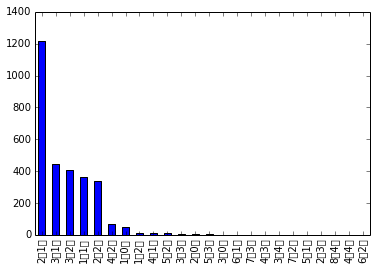

In [134]:
df.fangxin.value_counts().plot(kind='bar')

In [136]:
df.xiaoqu.value_counts()[:30]

天通西苑三区     29
天通西苑二区     26
新龙城        26
星河皓月       24
福城上上城五期    16
天通苑中苑      16
天通苑北三区     16
美林湾        14
天通苑东一区     14
北京像素北区     13
翠成馨园       12
北苑家园望春园    12
天通苑北一区     12
北京人家       12
流星花园三区     12
东亚上北中心     12
天通苑北二区     12
北京北        11
大方居        10
天通苑东三区     10
福城上上城三季     9
荣丰2008      9
华纺易城        8
纳丹堡         8
北苑家园茉藜园     8
北京像素南区      8
名佳花园三区      8
福苑小区        8
京贸国际公寓      8
后现代城        8
Name: xiaoqu, dtype: int64

In [138]:
df.chaoxiang.value_counts()

南北        1413
南          396
东南         210
西南         191
东西         129
东          111
西           94
西北          93
东北          90
北           58
东南北         58
南西北         34
西南北         22
南西          20
东南西         13
东南西北        12
东西北          7
西南东北         4
南西南          2
东南南          2
东南东北         1
北东南          1
西西北北         1
南北东          1
东南西南         1
东南西南西北       1
北南           1
东西南          1
南北西          1
西南西          1
西南西西北        1
Name: chaoxiang, dtype: int64

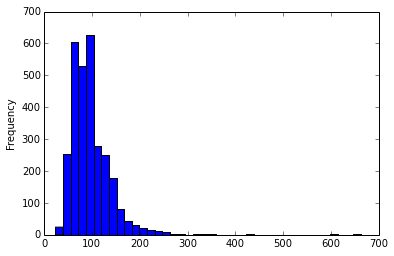

In [141]:
df.area.plot(kind='hist',bins=40)

In [142]:
df.area.describe()

count    2970.000000
mean       95.849343
std        41.301808
min        23.790000
25%        67.435000
50%        89.000000
75%       114.687500
max       661.810000
Name: area, dtype: float64

In [162]:
def dist_ditie(x):
    #if type(x) is not str:
    #    raise Exception('TypeError: %s' % str(type(x)))
    s = re.search(r'距离.+?(\d+)米', str(x))
    if s is None:
        return np.nan
    else:
        return float(s.groups()[0])
df['ditie_juli'] = df['tag'].map(dist_ditie)

In [151]:
print re.search(r'距离.+?(\d+)米', '距离13号线龙泽站428米房本满两年随时看房').groups()

('428',)


In [165]:
df['ceng'] = df.pos.map(lambda x: int(re.search(r'共(\d+)层', x).groups()[0]))

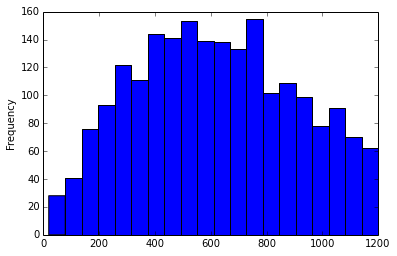

In [168]:
df.ditie_juli.plot(kind='hist', bins=20)

In [169]:
df.ditie_juli.describe()

/Library/Python/2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    2085.000000
mean      618.351559
std       287.206903
min        19.000000
25%              NaN
50%              NaN
75%              NaN
max      1200.000000
Name: ditie_juli, dtype: float64

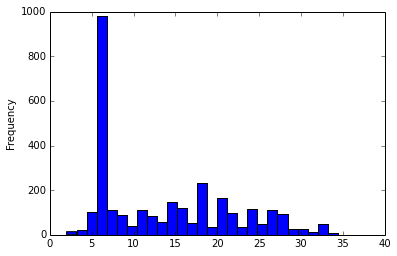

In [172]:
df.ceng.plot(kind='hist', bins=30)

In [173]:
df.ceng.describe()

count    2970.000000
mean       13.648485
std         8.063344
min         2.000000
25%         6.000000
50%        12.000000
75%        20.000000
max        38.000000
Name: ceng, dtype: float64

In [170]:
df.head()

,url,title,info,pos,follow,tag,price,unitprice,price_num,unitprice_num,xiaoqu,fangxin,area,chaoxiang,zhuangxiu,dianti,ditie_juli,ceng
0,http://bj.lianjia.com/ershoufang/101100762406....,龙泽苑西区两居室，商品房已经满五年，好户型,龙泽苑西区|2室1厅|80.35平米|南北|精装|无电梯,低楼层(共6层)2000年建板楼-龙泽,120人关注/共50次带看/7天以前发布,距离13号线龙泽站428米房本满两年随时看房,460万,单价57250元/平米,460.0,57250.0,龙泽苑西区,2室1厅,80.35,南北,精装,无电梯,428.0,6
1,http://bj.lianjia.com/ershoufang/101100671982....,新城经典东向大三居，高层观景 视野棒。满五年唯一 ！,望京新城|3室2厅|142.93平米|东南|精装|有电梯,高楼层(共25层)2000年建板塔结合-望京,127人关注/共44次带看/26天以前发布,距离15号线望京站517米房本满两年随时看房,865万,单价60520元/平米,865.0,60520.0,望京新城,3室2厅,142.93,东南,精装,有电梯,517.0,25
2,http://bj.lianjia.com/ershoufang/101100672915....,东南金角 免税电梯花园洋房 居家养老宜居,东亚上北中心|2室1厅|77平米|东南|精装|有电梯,中楼层(共21层)2009年建板塔结合-回龙观,79人关注/共54次带看/26天以前发布,房本满两年随时看房不限购,306万,单价39741元/平米,306.0,39741.0,东亚上北中心,2室1厅,77.00,东南,精装,有电梯,NaN,21
3,http://bj.lianjia.com/ershoufang/101100755034....,朝阳园 二期小三居 满五年 高楼层 视野开阔 有钥匙,朝阳园|3室2厅|113.22平米|西|精装|有电梯,高楼层(共29层)2002年建塔楼-甘露园,92人关注/共31次带看/9天以前发布,距离6号线青年路站575米房本满两年随时看房,690万,单价60944元/平米,690.0,60944.0,朝阳园,3室2厅,113.22,西,精装,有电梯,575.0,29
4,http://bj.lianjia.com/ershoufang/101100656261....,免税 东南双卫三居 带飘窗 随时看房诚意出售,苹果社区南区|3室1厅|124.58平米|东南|精装|有电梯,中楼层(共26层)2006年建板塔结合-双井,79人关注/共50次带看/30天以前发布,距离7号线九龙山站816米房本满两年随时看房,1060万,单价85086元/平米,1060.0,85086.0,苹果社区南区,3室1厅,124.58,东南,精装,有电梯,816.0,26


In [177]:
df = pd.read_csv('data/sz_cs_hf.csv', sep='\t', header=None, names=['url', 'title','info','pos','follow','tag','price','unitprice'])

In [200]:
bj = 'http://hz.'
df[df.apply(lambda x: x.url[:len(bj)] == bj, axis=1)].to_csv('data/hz.csv')

In [189]:
df.url.map(lambda x:x[:len(bj)]).value_counts()

http://sz.    6150
http://hz.    5940
http://gz.    5938
http://hf.    3810
http://cs.    3000
http://bj.    3000
Name: url, dtype: int64

In [217]:
!python analysis.py data/sz.csv

   Unnamed: 0                                                url  \
0        3000  http://sz.lianjia.com/ershoufang/105100406247....   
1        3001  http://sz.lianjia.com/ershoufang/105100448309....   
2        3002  http://sz.lianjia.com/ershoufang/105100155267....   
3        3003  http://sz.lianjia.com/ershoufang/105100443856....   
4        3004  http://sz.lianjia.com/ershoufang/105100451566....   

                        title                             info  \
0     宝安碧海大区 3房 满5年 红本在手 拎包入住   碧海富通城二期|3室2厅|115.38平米|南|精装|有电梯   
1      福田区大社区一楼带私家花园带省级学校，满五年          新洲花园|3室1厅|90平米|南|精装|无电梯   
2       金海燕花园 地铁口 安静舒适4房 明德学位       金海燕花园|4室2厅|127平米|东北|精装|有电梯   
3  南溪新苑  楼下吉之岛，地铁口约200米，光线充足。          南溪新苑|1室1厅|42平米|北|简装|有电梯   
4   鸿荣源花园社区精装三房满五年，红本在手弘雅文汇学位  弘雅花园雅豪轩三期|3室2厅|82.37平米|南|精装|无电梯   

                       pos                 follow  \
0     高楼层(共18层)2007年建塔楼-西乡  109人关注/共54次带看/1个月以前发布   
1      低楼层(共8层)1996年建板楼-新洲   82人关注/共58次带看/24天以前发布   
2  中楼层(共16层)1997年建板塔结合-华侨城  73人关注/共

In [215]:
[1].__getitem__(5)

IndexError: list index out of range